# **Tech Challenge - Time 7**

**Desafio** Prever o valor dos custos m√©dicos individuais cobrados pelo seguro sa√∫de.

**Target:** pre√ßo do seguro sa√∫de


**Integrantes**
* Yuri Fernandes
* Leonardo Ayres
* Camilo
* Douglas de Almeida Costa
* Patrick Pac√≠fico da Silva



# **1. Explora√ß√£o e pr√© processamento dos dados**

# **1.1 Carregamento da base de dados**

Buscamos uma base de dados no Kagle com as informa√ß√µes que entendemos que nos ajudar.
Como o Kagle √© um reposit√≥rio p√∫blico de bases e nossos colegas de classe podem utilizar a mesma base, pedimos para a IA enriquecer a base, tornando-a √∫nica para o nosso grupo.

In [854]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/Yuriferr/TechChallenge-Fase01/refs/heads/main/base_dados_custos_medicos.csv")


# **1.2 Explorando caracter√≠sticas**

In [855]:
df.head()

idade     g√™nero    imc  filhos fumante    regi√£o   encargos
0   58.0          M  20.80     2.0     N√ÉO  Noroeste   15595.78
1   56.0   Feminino  30.07     1.0     sim        SE  170044.60
2   27.0          F  24.77     1.0     sim        NO   33858.18
3   23.0          F  30.13     0.0     n√£o        SO   10887.06
4   58.0  Masculino  21.96     3.0     N√ÉO        NE   26670.40

Conforme acima, a base escolhida cont√©m os seguintes dados:
1. Idade;
2. G√™nero;
3. IMC (√çndice de Massa Corporea);
4. Quantidade de filhos;
5. Se √© fumante;
6. Regi√£o onde mora;
7. Encargos do seguro sa√∫de.



In [856]:
df.shape

(1000, 7)

In [857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     980 non-null    float64
 1   g√™nero    1000 non-null   object 
 2   imc       974 non-null    float64
 3   filhos    994 non-null    float64
 4   fumante   1000 non-null   object 
 5   regi√£o    987 non-null    object 
 6   encargos  1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


Se trata de uma base com 1000 registros e 7 colunas, onde a metade das colunas t√™m o formato de texto (object) e a outra metade t√™m o formato num√©rico (float64). Precisamos transformar todas as colunas para o formato n√∫mero, uma vez que os modelos s√£o treinados com dados desse tipo. Mas faremos isso mais para frente.





O dado que ser√° o nosso ***Target*** √© a coluna ***encargos***.

As vari√°veis num√©ricas s√£o: idade, imc e filhos.

As vari√°veis categ√≥ricas s√£o: g√™nero, fumante e regi√£o.


Iniciamos a observa√ß√£o da correla√ß√£o hipot√©tica dos dados com o nosso *target* (encargos), ou seja, quais dados podem influenciar no pre√ßo do plano.

Nos parece que todas as colunas podem influenciar no resultado:
1. *idade*: Quando o individuo √© um beb√™ ou est√° na velhice, tende a realizar mais consultas e exames. Logo, pode encarecer o plano;
2. *g√™nero*: Mulheres tendem a ser mais cuidadosas do que os homens, realizam mais consultas e exames peri√≥dicos. Al√©m disso, podem engravidar, necessitando utilizar muito o plano durante esse per√≠odo. Podemos dizer que as mulheres podem utilizar mais o plano de forma rotineira. J√° o homem, por ser menos cuidado, tende a utilizar o plano quando h√° alguma ocorr√™ncia de sa√∫de;
3. *imc*: O IMC pode indicar que um indiv√≠duo √© sedent√°rio, tem uma vida ativa ou etc. Essa correla√ß√£o pode nos dizer que o indiv√≠duo √© mais saud√°vel ou n√£o, determinando a frequencia de utiliza√ß√£o do plano de sa√∫de;
4. *filhos*: A quantidade de filhos pode indicar dependentes. Todas as hip√≥teses que discutimos podem ser aplicados aos dependentes. Mesmo n√£o tendo os dados dos dependentes (idade, imc e outros) a quantidade de filhos pode indicar uma maior utiliza√ß√£o do plano.
5. *fumante*: Fumar gera s√©rios problemas para a sa√∫de. Logo, h√° uma forte rela√ß√£o com o custo do plano.
6. *regi√£o*: n√£o sabemos se a regi√£o √© um grande fator para determinar o pre√ßo, mas deve exercer alguma influ√™ncia. Se o indiv√≠duo viver em uma regi√£o menos desenvolvida, por exemplo, pode ter mais problemas de sa√∫de.


Basedo nessa an√°lise hipot√©tica, entendemos que a base pode ser √∫til para treinar o modelo para chegarmos no nosso *target*.
Passaremos agora a analisar atrav√©s de estat√≠sticas descritivas e visualizar distribui√ß√µes relevantes.


# **1.3 An√°lise estat√≠stica descritiva**

# **1.3.1 An√°lise das vari√°veis num√©ricas**

Iniciamos atrav√©s das an√°lises descritivas das vari√°veis num√©ricas.

In [858]:
df.describe()

idade         imc      filhos       encargos
count  980.000000  974.000000  994.000000    1000.000000
mean    41.435714   28.230349    1.321932   56695.267850
std     13.461516    6.852801    1.135787   45517.418719
min     18.000000   16.290000    0.000000    6797.230000
25%     30.000000   22.995000    0.000000   20565.665000
50%     42.000000   27.760000    1.000000   39494.570000
75%     53.000000   31.987500    2.000000   83627.950000
max     64.000000   52.890000    5.000000  231186.510000

Ao analisar os dados num√©ricos chegamos as seguintes conclus√µes:

**idade**
1. A m√©dia de idade √© de 41 anos. Tendo em vista que o desvio padr√£o √© 13, a idade est√° bem distribu√≠da na base.
2. A idade m√≠nima e m√°xima s√£o 18 e 64 anos, respectivamente. Ent√£o o modelo n√£o poder√° ser aplicado para crian√ßas e adolescentes, uma vez que n√£o temos informa√ß√£o no modelo nesse universo para treinamento, e nem para idosos de muita idade.
3. O valor m√≠nimo da base (18 anos) comparado ao quartil 25% (30) n√£o √© muito distante. O valor m√°ximo (64 anos) comparado ao quartil 75% (53) tamb√©m n√£o √© distante. Logo, imaginamos que n√£o h√° outliers aqui.

**imc**
1. A m√©dia do imc √© de 28 anos. Tendo em vista que o desvio padr√£o √© 6, o imc est√° bem distribu√≠do na base.
2. O valor m√≠nimo da base (16) comparado ao quartil 25% (22) n√£o √© muito distante.J√° o valor m√°ximo (52) comparado ao quartil 75% (31) √© quase o dobro. Logo, pode haver outliers com alto valor de imc ou pode indicar que h√° um pequeno grupo de obesos. Atrav√©s dos gr√°ficos poderemos entender melhor esse cen√°rio;
3. A maioria dos indiv√≠dulos t√™m o imc at√© 31 (quartil 75%). Ent√£o, talvez seja uma base que representa uma popula√ß√£o com imc mais equilibrado.

**filhos**
1. A maiorida dos indiv√≠dulos da base t√™m 1 filho. A m√©dia e mediana s√£o muito pr√≥ximas. Ent√£o, n√£o h√° uma grande varia√ß√£o de filhos nessa popula√ß√£o.
2. Temos poucos indiv√≠duos com 5 filhos;
3. At√© 75% da base t√™m 2 filhos;
4. Conforme itens 1, 2 e 3, parece que a distribui√ß√£o de filhos √© coerente com a realidade da popula√ß√£o.

**encargos**
1. A m√©dia e mediana est√£o pr√≥ximas. Logo, n√£o h√° muita varia√ß√£o de dados. Talvez tenhamos outliers aqui;
2. Valores m√≠nimos e m√°ximos est√£o bem distantes;
3. O quartil 75% (83627) est√° bem distante do valor m√°ximo (231186). Mais uma indica√ß√£o que pode existir outliers.

De forma geral, parece ser uma base equilibrada. Talvez a preocupa√ß√£o sejam com outliers relacionados aos encargos. Vamos visualizar os dados atrav√©s de gr√°ficos para aprofundar na an√°lise.

# **1.3.2 An√°lise das vari√°veis categ√≥ricas**

Vamos identificar as varia√ß√µes existentes em cada vari√°vel.

In [859]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

g√™nero: ['M' 'Feminino' 'F' 'Masculino' 'f' 'masculino' 'feminino' 'm']
fumante: ['N√ÉO' 'sim' 'n√£o' 'N' 'SIM' 's' 'N√£o' 'Sim' 'n' 'S']
regi√£o: ['Noroeste' 'SE' 'NO' 'SO' 'NE' 'Sudoeste' 'Centro' 'noroeste' 'nordeste'
 'centro' 'Sudeste' 'sudeste' nan 'sudoeste' 'Nordeste' 'C']


H√° muitas varia√ß√µes. Precisaremos padroniz√°-las.

Iniciaremos com a an√°lise da vari√°vel *g√™nero*.

Primeiro vamos identificar as varia√ß√µes de valores e padroniz√°-los como *masculino* e *feminino*.

In [860]:
#Padronizar valores da coluna g√™nero
#Todos os valores: ['M' 'm' 'F' 'feminino' 'masculino' 'Masculino' 'Feminino' 'f']
df['g√™nero'] = df['g√™nero'].replace(['M', 'm', 'F', 'feminino', 'masculino', 'Masculino', 'Feminino', 'f'], ['masculino', 'masculino', 'feminino', 'feminino', 'masculino', 'masculino', 'feminino', 'feminino'])

print(df['g√™nero'].unique())

['masculino' 'feminino']


Agora a vari√°vel *fumante*. Vamos padroniz√°-los entre *sim* e *n√£o*.

In [861]:
#Padronizar valores da coluna fumante
#Todos os valores: ['s' 'N' 'Sim' 'N√ÉO' 'N√£o' 'SIM' 'S' 'n√£o' 'sim' 'n']
df['fumante'] = df['fumante'].replace(['s', 'N', 'Sim', 'N√ÉO', 'N√£o', 'SIM', 'S', 'n√£o', 'sim', 'n'], ['sim', 'n√£o', 'sim', 'n√£o', 'n√£o', 'sim', 'sim', 'n√£o', 'sim', 'n√£o'])

print(df['fumante'].unique())

['n√£o' 'sim']


A vari√°vel *regi√£o* ficar√° padronizada em *noroeste*, *sudeste*, *nordeste*, *sudoeste* e *centro*.

In [862]:
#Padronizar valores da coluna regi√£o
#Todos os valores: ['nordeste' 'centro' 'noroeste' 'Sudeste' 'C' 'sudeste' 'SO' 'SE' 'Nordeste' 'Noroeste' 'sudoeste' 'NO' 'Sudoeste' 'NE' 'Centro']
df['regi√£o'] = df['regi√£o'].replace(['nordeste', 'centro', 'noroeste', 'Sudeste', 'C', 'sudeste', 'SO', 'SE', 'Nordeste', 'Noroeste', 'sudoeste', 'NO', 'Sudoeste', 'NE', 'Centro'],
 ['nordeste', 'centro', 'noroeste', 'sudeste', 'centro', 'sudeste', 'sudeste', 'sudeste', 'nordeste', 'noroeste', 'sudoeste', 'noroeste', 'sudoeste', 'nordeste', 'centro'])

print(df['regi√£o'].unique())

['noroeste' 'sudeste' 'nordeste' 'sudoeste' 'centro' nan]


# **1.3.3 An√°lise e tratamento de valores nulos**

Vamos identificar quais s√£o as vari√°veis que est√£o com valores nulos.

In [863]:
print(df.isnull().sum())

idade       20
g√™nero       0
imc         26
filhos       6
fumante      0
regi√£o      13
encargos     0
dtype: int64


As vari√°veis idade, imc, filhos e regi√£o cont√©m valores nulos.
N√£o h√° nada intuitivo para definir um valor padr√£o para as colunas nulas de idade, imc e regi√£o. Ent√£o, optaremos em excluir essas colunas.

H√° apenas 6 registros com a coluna de filhos nula. Decidimos que vamos considerar esses indiv√≠dulos como "sem filhos". Como s√£o poucos, achamos que √© melhor do que excluir todo o regsitro. Faremos isso a seguir.

In [864]:
#Valores nulos da coluna filhos deve se tornar 0
df['filhos'].fillna(0, inplace=True)

<ipython-input-864-527809e8efbd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['filhos'].fillna(0, inplace=True)


In [865]:
print(df['filhos'].isnull().sum())

0


Agora vamos excluir os registros nulos que restaram.

Revisando valores nulos restantes (note que n√£o h√° mais registros nulos para filhos).

In [866]:
print(df.isnull().sum())

idade       20
g√™nero       0
imc         26
filhos       0
fumante      0
regi√£o      13
encargos     0
dtype: int64


Executando a exclus√£o dos registros com valores nulos.

In [867]:
#Remover valores nulos
df = df.dropna()

Conferindo o resultado.

In [868]:
print(df.isnull().sum())

idade       0
g√™nero      0
imc         0
filhos      0
fumante     0
regi√£o      0
encargos    0
dtype: int64


# **1.4 Visualiza√ß√£o de distribui√ß√µes e correla√ß√µes relevantes**

Com as vari√°veis categ√≥ricas normalizadas, vamos analisar as distribui√ß√µes.



# **1.4.1 Analisando a distribui√ß√£o das vari√°veis categ√≥ricas**

**G√™nero**

In [869]:
df['g√™nero'].value_counts()

g√™nero
feminino     478
masculino    467
Name: count, dtype: int64

In [870]:
df['g√™nero'].value_counts(normalize=True)

g√™nero
feminino     0.50582
masculino    0.49418
Name: proportion, dtype: float64

H√° uma distribui√ß√£o equilibrada em g√™nero. Aproximadamente 50% para mulheres (51%, exatamente) e 50% para homens (48%, exatamente).

**Fumante**

In [871]:
df['fumante'].value_counts()

fumante
sim    478
n√£o    467
Name: count, dtype: int64

In [872]:
df['fumante'].value_counts(normalize=True)

fumante
sim    0.50582
n√£o    0.49418
Name: proportion, dtype: float64

H√° uma distribui√ß√£o ainda mais equilibrada em fumante. Aproximadamente 50,4% para fumantes e 49,6% para n√£o fumantes.

**Regi√£o**

In [873]:
df['regi√£o'].value_counts()

regi√£o
sudeste     231
nordeste    215
centro      197
noroeste    186
sudoeste    116
Name: count, dtype: int64

In [874]:
df['regi√£o'].value_counts(normalize=True)

regi√£o
sudeste     0.244444
nordeste    0.227513
centro      0.208466
noroeste    0.196825
sudoeste    0.122751
Name: proportion, dtype: float64

1. A maioria dos indiv√≠duos est√£o na regi√£o sudeste.
2. A menor popula√ß√£o est√° na regi√£o sudoeste.
3. De forma geral n√£o h√° uma grande varia√ß√£o entre a quantidade de indiv√≠duos entre as regi√µes;

In [875]:
#df.corr()
#üìå 4. Correla√ß√£o entre vari√°veis num√©ricas
#Use df.corr() (ou sns.heatmap(df.corr())) para:

#Ver se h√° correla√ß√£o entre charges e outras vari√°veis (como age, bmi, children)
#Avaliar multicolinearidade (vari√°veis muito correlacionadas entre si, que podem atrapalhar a regress√£o)

# **1.4.2 Analisando a distribui√ß√£o das vari√°veis num√©ricas**

Ap√≥s o tratamento iniciais dos dados, vamos analisar a distribu√≠√ß√£o das vari√°veis num√©ricas.

J√° realizamos a an√°lise descritiva no item 1.3.1 e agora faremos an√°lises visuais atrav√©s de gr√°ficos.

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

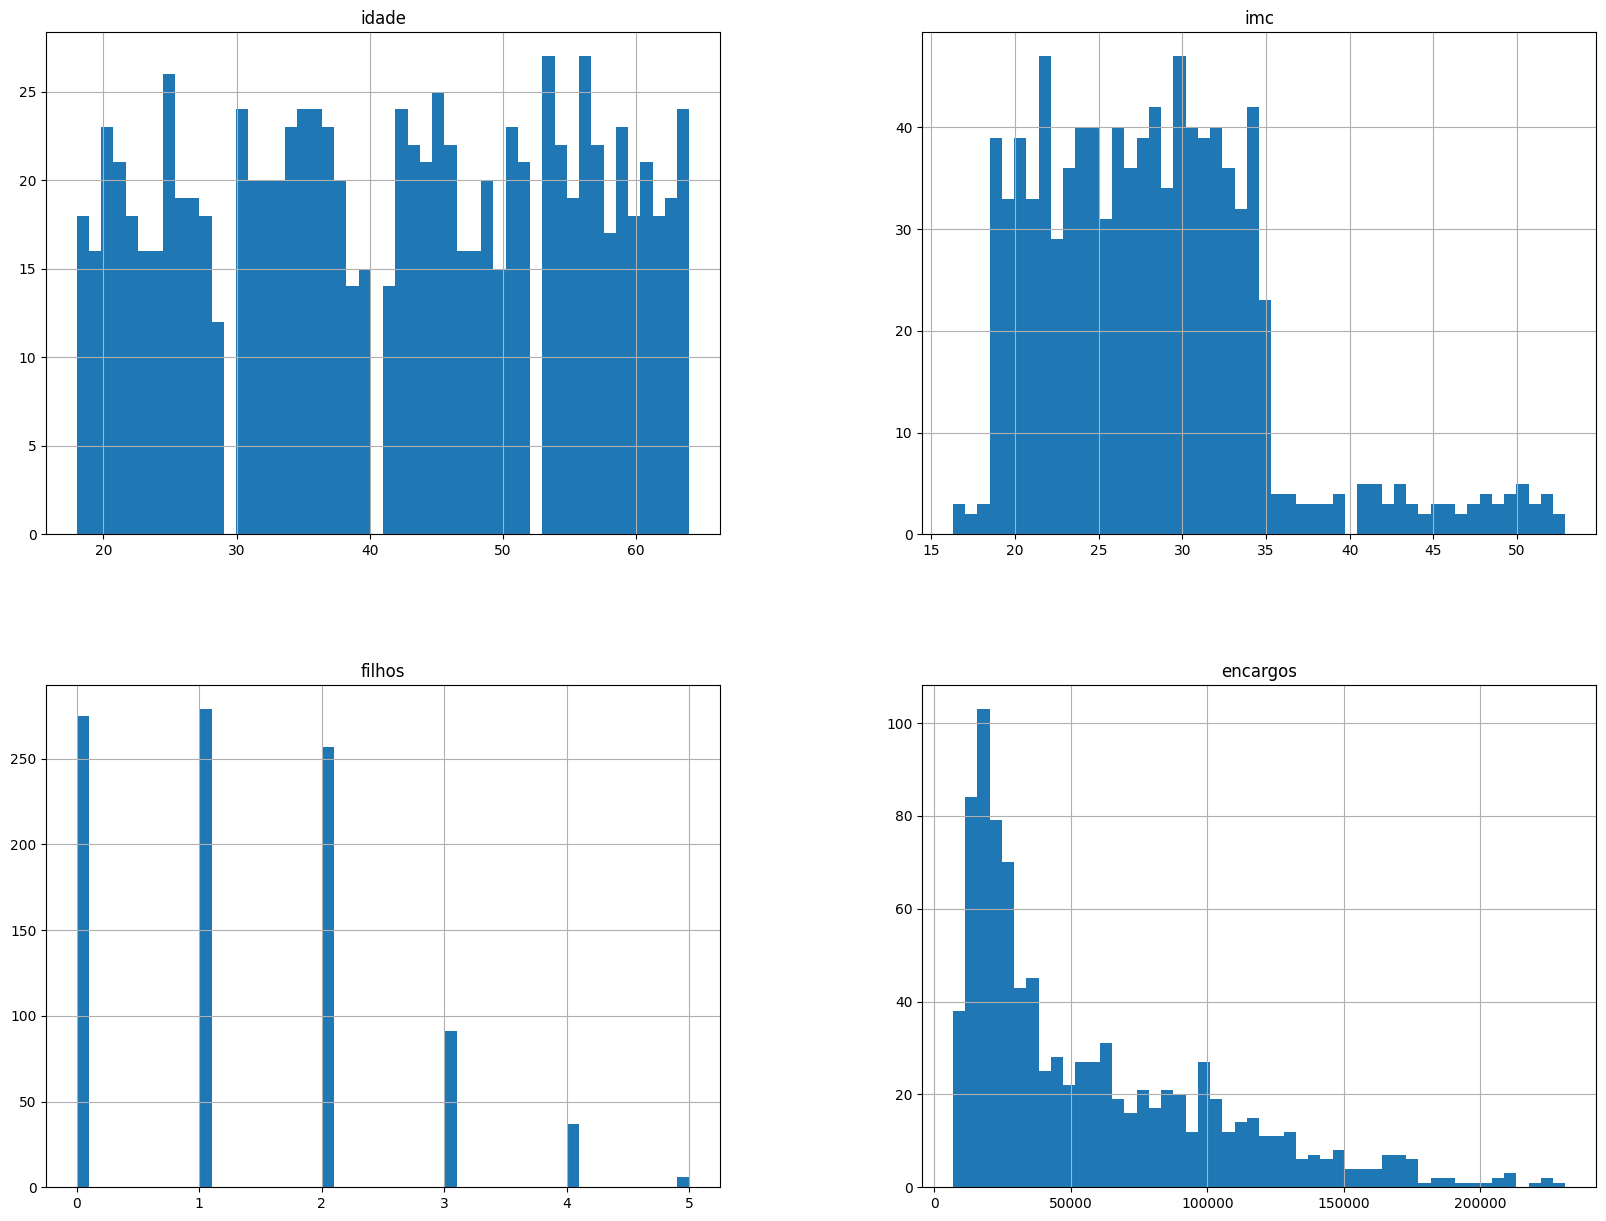

In [876]:
df.hist(bins=50, figsize=(20,15))

**Observa√ß√µes**

**idade**
1. Realmente h√° uma boa distribui√ß√£o de idade na base;
2. H√° um vazio "buraco" de amostra das idades apriximadas de 29, 41 e 53, observando atrav√©s dos espa√ßos em branco no gr√°fico aparentemente nessas idades;
3. Realmente n√£o h√° outliers em idade. Os valores est√£o concetnrados entre 18 e 64 anos. N√£o h√° necessidade de um tratamento nesse sentido aqui.

**imc**
1. A grande parte do IMC est√° concentra√ß√£o nos valores 19 e 35;
2. H√° uma quantidade menor de indiv√≠dulos com o IMC entre 35 e 52;
3. Baseados no item 1 e 2, se trata de uma base que a maioria da popula√ß√£o n√£o √© obesa. Parece representar a realidade.
2. Atrav√©s do gr√°fico n√£o parece existir outiliers, mas sim, representar um pequeno grupo de obesos. Na an√°lise que fizemos atrav√©s do *df.describe()* anteriormente ficamos com essa d√∫vida.

**filhos**
1. A maiorida dos indiv√≠dulos da base t√™m 1 filho. Comprovamos atrav√©s do gr√°fico que n√£o h√° uma grande varia√ß√£o de filhos nessa popula√ß√£o;
3. Grande parte da base est√° concentrada em at√© 2 filhos;
4. N√£o h√° outliers.

**encargos**
1. A maior parte do valor dos encargos est√£o concentrados mais a esqueda do gr√°fico;
2. A quantidade de planos caros √© baixa, mas observamos um pequena concentra√ß√£o a direita. N√£o parece ser outliers.

Realmente parece ser uma base equilibrada. Vamos gerar mais gr√°ficos para nos aprofundar ainda na an√°lise.

# **1.4.3 Correla√ß√£o entre as vari√°veis**

Imaginamos que algumas vari√°veis incluenciam no valor do encargo e queremos observar se a base tem essa presentatividade. As influ√™cias s√£o:
1. A idade do indiv√≠duo influencia no valor do encargo, sendo mais alto para aqueles que fumam;
2. O IMC do indiv√≠duo influencia no valor do encargo, sendo mais alto para aqueles que fumam.
3. O encargo √© mais alto para mulheres como descrvemos no item 1.2?
4. O encargo deve ser mais alto para fumantes;
5. Qual a influ√™ncia da regi√£o no valor dos encargos?
6. A quantidade de filhos realmente impacta no valor do encargo?
7. Como acreditamos que o fato de ser fumante √© de grande influ√™ncia no encargo, ser√° que a base est√° equilibrada com essa caracter√≠stica?

# **1.4.3.1 Idade vs Fumante vs Encargos**

Vamos analisar a agora a influ√™ncia da idade e fumantes no valor dos encargos.




Text(0, 0.5, 'Encargos')

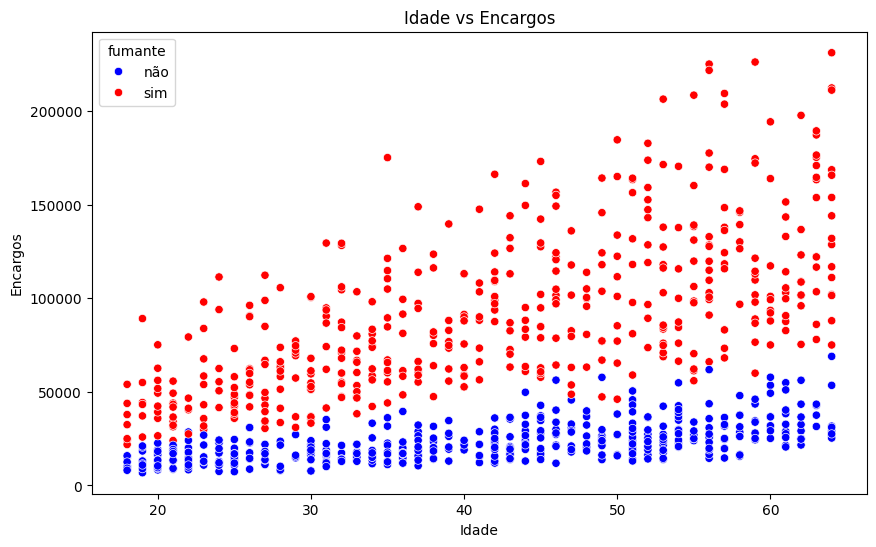

In [877]:
#grafico idade, valor e fumante
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='idade', y='encargos', hue='fumante', palette={'sim': 'red', 'n√£o': 'blue'})
#sns.scatterplot(data=df, x='idade', y='encargos')
plt.title('Idade vs Encargos')
plt.xlabel('Idade')
plt.ylabel('Encargos')

**Observa√ß√µes**
1. De forma geral, podemos observar que h√° uma crescente no valor dos encargos para indiv√≠duos mais velhos. Ou seja, √© mais barato aos mais novos e mais caro aos mais velhos;
2. H√° uma grande diferen√ßa no valor quando o indiv√≠duo √© fumante. O valor do encargo √© maior para quem fuma;
3. Existem encargos alt√≠ssimos para indiv√≠dulos mais velhos e fumantes.

Conlu√≠mos que sim, a base representa que a idade do indiv√≠duo influencia no valor do encargo, sendo mais alto para aqueles que fumam.

# **1.4.3.2 Correla√ß√£o das vari√°veis num√©ricas**

Vamos analisar correla√ß√£o das vari√°veis num√©ricas atuais.

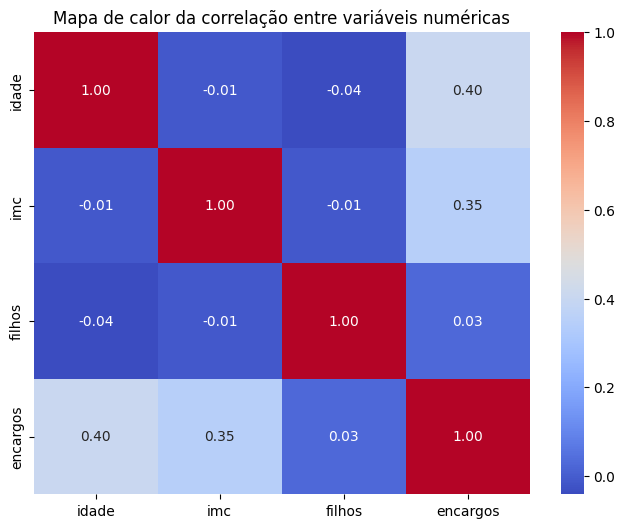

In [878]:
# Calcular a matriz de correla√ß√£o apenas para colunas num√©ricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor da correla√ß√£o entre vari√°veis num√©ricas')
plt.show()

**Observa√ß√µes**
1. A quantidade de filhos n√£o muita relev√¢ncia no valor de encargo;
2. O IMC tem relev√¢ncia equilibrada no valor de encargo;
2. A idade tem relev√¢ncia equilibrada no valor de encargo. √â ligeiramente maior do que o IMC.

Conlu√≠mos que a idade e IMC s√£o relevantes para se considerar no valor do seguro sa√∫de.

# **1.4.3.2 IMC vs Fumante vs Encargos**

Vamos analisar a agora a influ√™ncia do IMC e fumantes no valor dos encargos.


Text(0, 0.5, 'Encargos')

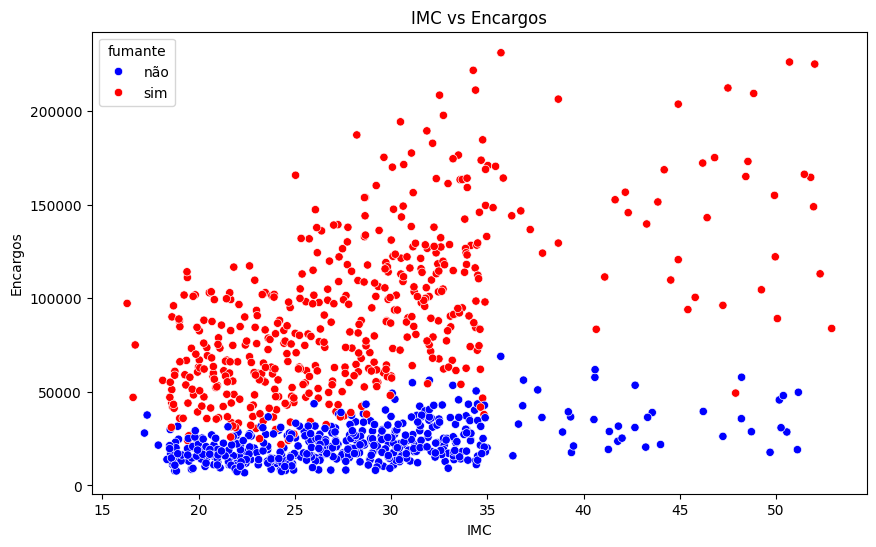

In [879]:
#Grafico de dispersao entre imc vs encargos e fumantes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='imc', y='encargos', hue='fumante', palette={'sim': 'red', 'n√£o': 'blue'})
plt.title('IMC vs Encargos')
plt.xlabel('IMC')
plt.ylabel('Encargos')

**Observa√ß√µes**
1. Indiv√≠duos com IMC mais baixo pagam menores encargos. Mas n√£o √© uma diferen√ßa t√£o significativa;
2. H√° indiv√≠duos com IMC mais baixo, pr√≥ximo de 30, com valores mais altos de encargos do que indiv√≠dulos com IMC mais alto;
3. Ser fumante impacta significativamente no valor dos encargos. Somado ao IMC alto, o valor fica ainda maior;
4. N√£o identificamos outliers na base. N√£o realizaremos esse tratamento.

Conlu√≠mos que o IMC n√£o tem uma influ√™ncia significativa no valor dos encargos. H√° diferen√ßa, mas n√£o t√£o grande. O maior fator do encarecimento √© o fato de ser fumante.

# **1.4.3.3 Corre√ß√£o de g√™nero, fumante, regi√£o e filhos com os encargos**

<ipython-input-880-0e169243cce0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col].astype(str), y=df['encargos'], palette='viridis') # .astype(str) para garantir que 'filhos' seja tratada como categoria
<ipython-input-880-0e169243cce0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col].astype(str), y=df['encargos'], palette='viridis') # .astype(str) para garantir que 'filhos' seja tratada como categoria
<ipython-input-880-0e169243cce0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col].astype(str), y=df['encargos'], 

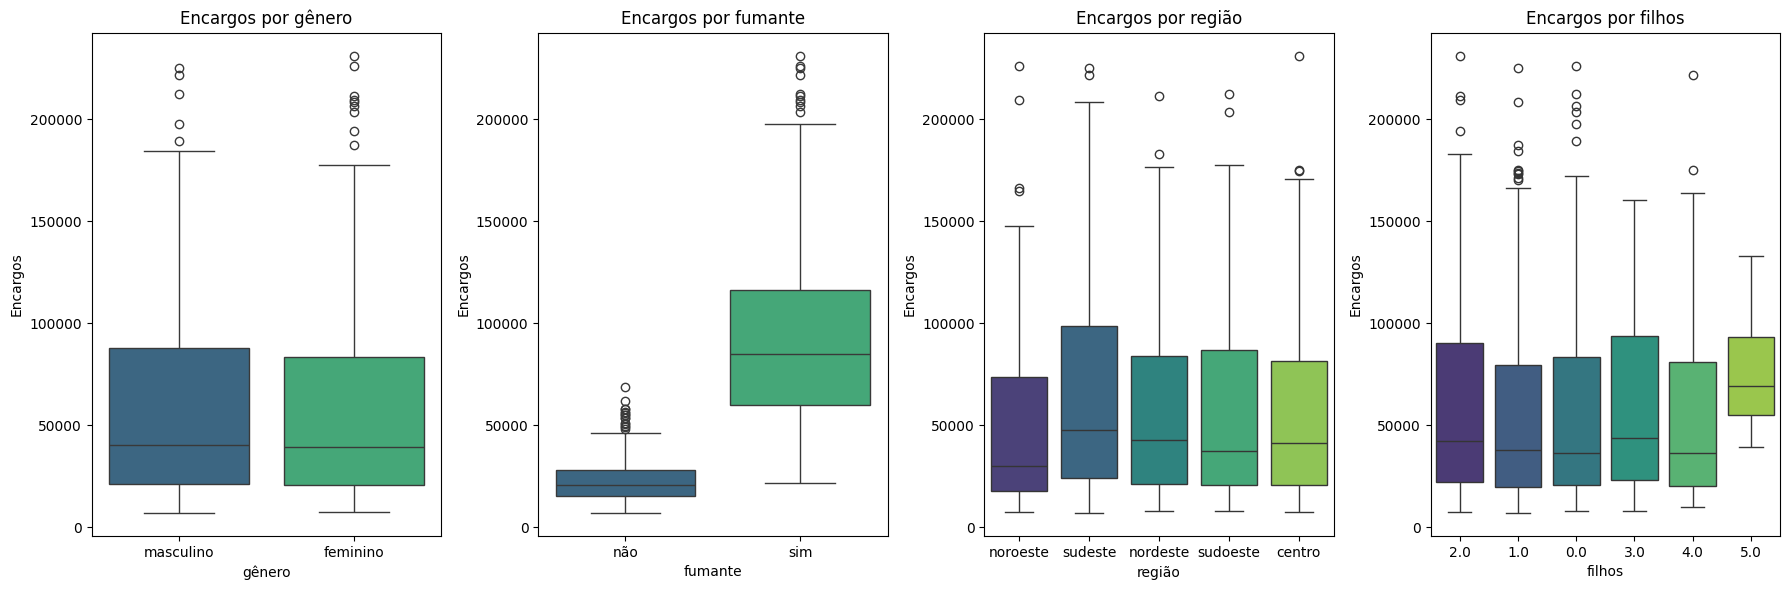

In [880]:
# Box Plots para 'encargos' vs. vari√°veis categ√≥ricas
categorical_cols = ['g√™nero', 'fumante', 'regi√£o', 'filhos'] # filhos pode ser tratado como categ√≥rica para box plot
plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)
    sns.boxplot(x=df[col].astype(str), y=df['encargos'], palette='viridis') # .astype(str) para garantir que 'filhos' seja tratada como categoria
    plt.title(f'Encargos por {col}')
    plt.xlabel(col)
    plt.ylabel('Encargos')
plt.tight_layout()
plt.show()

**Observa√ß√µes**
1. N√£o h√° diferen√ßa nos encargos quando comparamos homem e mulher. Logo, o g√™nero n√£o exerce influ√™ncia no valor como um hip√≥sete que t√≠nhamos;
2. Inegavelmente ser fumante encarece o valor do plano;
2. H√° diferen√ßa no valor do encargo baseada na regi√£o onde o indiv√≠duo mora, mas n√£o √© algo t√£o relevante. Entretanto, n√£o parece ser um problema para o treinamento do modelo.
4. Moradores do Sudeste em encargos mais altos;
5. O Encargo √© mais alto para quem tem 5 filhos. Entretant, n√£o parece haver uma rela√ß√£o forte com o valor, uma vez que de 0 at√© 4 filhos o custo √© bem equilibrado;
6. Em todos os gr√°ficos notamos valores elevados de encargos que est√£o distantes da concentra√ß√£o das demais vari√°veis. Ent√£o, entendemos que √© importante remover esses outliers para termos um melhor resultado no treinamento do modelo.

Conlu√≠mos que a hip√≥tese do valor do encargo ser mais alto para mulheres por serem mais cuidadosas e fazem mais exames, al√©m da possibilidade de gravidez, n√£o se reflete na base. Entretanto, n√£o vemos isso como um problema para o treinamento do medelo, foi apenas uma hipot√©se que n√£o se sustentou.
A fato de ser fumante √© a maior influ√™ncia no valor do encargo, o que √© muito coerente.
A regi√£o e quantidade de filhos parecem ter uma representatividade interessante, n√£o fugindo da realidade.
Al√©m disso, h√° outliers de encargos para todos os cen√°rios analisados. √â importante remov√™-los para melhorar o resultado do treinamento do modelo.
Por essas perspectivas, a base parece ser boa para o treinamento do modelo.

# **1.4.3.4 Representatividade de fumantes por g√™nero na base**

Vamos avaliar agora se a base est√° bem equilibrada com rela√ß√£o aos fumantes divididos entre homens e mulheres.

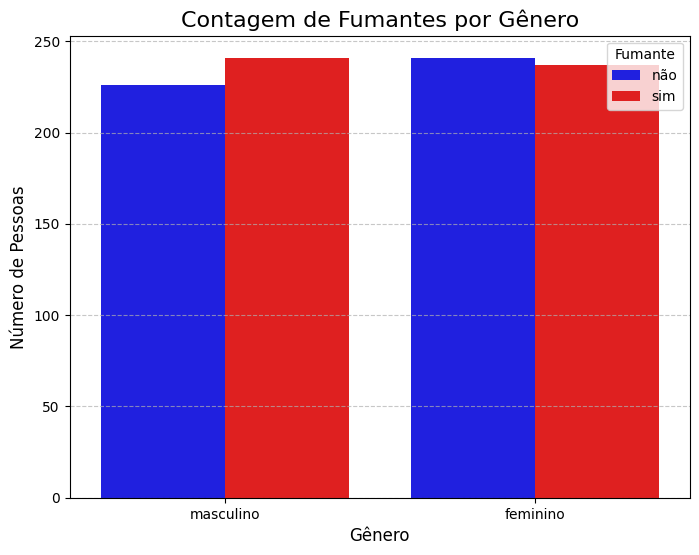

In [881]:
#grafico de comparacao genero, fumante
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='g√™nero', hue='fumante', palette={'sim': 'red', 'n√£o': 'blue'})

plt.title('Contagem de Fumantes por G√™nero', fontsize=16)
plt.xlabel('G√™nero', fontsize=12)
plt.ylabel('N√∫mero de Pessoas', fontsize=12)
plt.legend(title='Fumante')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observa√ß√µes**
1. A quantidade de homens fumantes e n√£o fumantes est√° bem equilibrada;
2. H√° um pouco mais de homens fumantes do que n√£o fumantes sendo representados na base;
3. A quantidade de mulheres fumantes e n√£o fumantes est√° bem equilibrada;
2. H√° um pouco mais de mulheres n√£o fumantes do que fumantes sendo representados na base;

Conclu√≠mos que a representa√ß√£o na base entre fumantes e n√£o fumantes divididos entre homens e mulheres est√° adequada.

# 3. Modelagem

Iniciaremos agora a modelagem dos dados preparando-os para o treinamento da base.

Iremos remover os outliers da vari√°vel encargos. A fun√ß√£o *clean_outliers* remove valores extremos de uma coluna num√©rica usando o m√©todo do intervalo interquartil (IQR), mantendo apenas os dados dentro de 1,5 (A constante 1,5 √© um fator amplamente usado para identificar outliers moderados) vezes a dist√¢ncia entre o 1¬∫ e o 3¬∫ quartil.

In [882]:
#Funcao para limpar outlies
def clean_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

#encargos
df = clean_outliers(df, 'encargos')

Precisamos transformar as vari√°veis categ√≥ricas em num√©ricas, uma vez que os modelos s√≥ trabalham com n√∫meros.

In [883]:
df.head()

idade     g√™nero    imc  filhos fumante    regi√£o   encargos
0   58.0  masculino  20.80     2.0     n√£o  noroeste   15595.78
1   56.0   feminino  30.07     1.0     sim   sudeste  170044.60
2   27.0   feminino  24.77     1.0     sim  noroeste   33858.18
3   23.0   feminino  30.13     0.0     n√£o   sudeste   10887.06
4   58.0  masculino  21.96     3.0     n√£o  nordeste   26670.40

In [884]:
from sklearn.preprocessing import LabelEncoder

colunas_categoricas = ['g√™nero', 'fumante', 'regi√£o']

label_encoder = LabelEncoder()

for coluna in colunas_categoricas:
    df[coluna] = label_encoder.fit_transform(df[coluna])

df.head()

idade  g√™nero    imc  filhos  fumante  regi√£o   encargos
0   58.0       1  20.80     2.0        0       2   15595.78
1   56.0       0  30.07     1.0        1       3  170044.60
2   27.0       0  24.77     1.0        1       2   33858.18
3   23.0       0  30.13     0.0        0       3   10887.06
4   58.0       1  21.96     3.0        0       1   26670.40

Agora que todas as vari√°veis s√£o num√©ricas, analisaremos a correla√ß√£o que h√° entre todas elas.

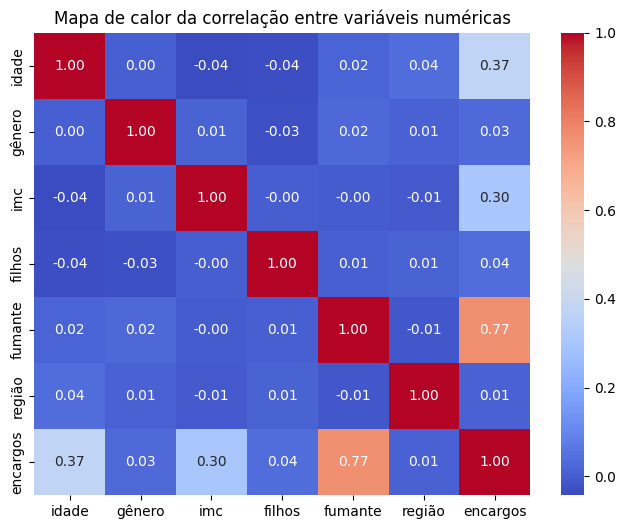

In [885]:
# Calcular a matriz de correla√ß√£o apenas para colunas num√©ricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor da correla√ß√£o entre vari√°veis num√©ricas')
plt.show()

**Observa√ß√µes**
1. A regi√£o tem rela√ß√£o quase nula com o valor do encargo;
2. Ser fumante √© determinante para o valor do encargo;
3. Como j√° analisado anteriormente idade e IMC tem relev√¢ncia parecida no valor de encargo;
4. Filhos e gen√™ro tem pouca rela√ß√£o com o valor de encargos.





Conclu√≠mos que as vari√°vies que mais impactam no valor do encargo √© fumante, imc e idade, sendo fumante a mais importante de todas.
Sendo assim, entendemos que a base representa um universo real, sendo coerente para utilizarmos no treinamento do nosso modelo para prever o valor do encargo.

Agora com todas as vari√°veis sendo representadas atrav√©s de n√∫meros, vamos iniciar a configura√ß√£o para o treinamento do modelo.

# 4. Treinamento e avalia√ß√£o do modelo

Prever os custos m√©dicos individuais cobrados pelo seguro sa√∫de (vari√°vel encargos) com base em caracter√≠sticas dos indiv√≠duos.

Configuramos os encargos como o nosso *target* colocando-o no eixo y e as demais vari√°veis no eixo x.

In [886]:
#Confiurar x e y
x = df.drop(['encargos'], axis=1)
y = df['encargos']

Separamos a base em 20% de teste e 80% treino.

In [887]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [888]:
print(len(x_train), "treinamento +", len(x_test), "teste")

744 treinamento + 186 teste


Treinamos o modelo.

In [889]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

Comparativo com outros algoritmos

In [890]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

models = {
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),  #0.8158547747792559
    'KNN': KNeighborsRegressor(n_neighbors=22), #0.7837624203797654
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost' : xgb.XGBRegressor(
      objective='reg:squarederror',  # objetivo para regress√£o
      n_estimators=100,              # n√∫mero de √°rvores
      learning_rate=0.1,             # taxa de aprendizado
      max_depth=3,                   # profundidade m√°xima das √°rvores
      random_state=42)
    #0.7986960141141736

}

results = {}
for name, model in models.items():
    model.fit(x_train_escalonado, y_train)
    y_pred = model.predict(x_test_escalonado)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
for name in sorted(results, key=lambda x: results[x]["R2"], reverse=True):
    print(f'{name}:')
    print(f'MAE: {results[name]["MAE"]}')
    print(f'MSE: {results[name]["MSE"]}')
    print(f'R2: {results[name]["R2"]}')
    print('\n')

XGBoost:
MAE: 10175.279369119622
MSE: 237455065.63142425
R2: 0.8884586132016142


Gradient Boosting:
MAE: 10295.081569337728
MSE: 240081386.935407
R2: 0.887224933390887


Random Forest:
MAE: 10862.643952688171
MSE: 253101834.1980911
R2: 0.8811087499329637


KNN:
MAE: 12735.718032746821
MSE: 350400539.0528287
R2: 0.835403965980155


Linear Regression:
MAE: 14920.266166947617
MSE: 418709015.4256178
R2: 0.803316959689322


Lasso:
MAE: 14919.958160343751
MSE: 418721527.6129979
R2: 0.8033110822542437


Ridge:
MAE: 14914.762510648428
MSE: 419103858.97970706
R2: 0.8031314871348646




Realizamos os testes atrav√©s de 7 modelos para identificar qual ter√° o melhor resultado, sendo o mais indicado para prever o custo do seguro sa√∫de. S√£o eles:
1. XGBoost;
2. Gradient Boosting;
3. Random Forest;
4. KNN;
5. Linear Regression;
6. Lasso;
7. Ridge.

Observamos que os melhores resultados s√£o dos modelos baseados em √°rvore - XGBoost, Gradient Boosting e Random Forest, pois apresentaram menores erros e maiores pontua√ß√µes R2. Isso significa que, para esse conjunto de dados, s√£o as melhores op√ß√µes para gerar previs√µes mais confi√°veis. O XGBoost foi o melhor deles, minimamente melhor que o Gradient Boosting.

# 5. Valida√ß√£o estat√≠stica

Criamos dois gr√°ficos com os objetivos:
1. Comparar os modelos pelos valores de erro MAE e MSE. Aqui, quanto
menor o erro, mais preciso √© o modelo;
2. Mostrar a pontua√ß√£o R2, que indica o quanto o modelo consegue prever corretamente a variabilidade dos dados;
3. Verificar qual modelo faz previs√µes mais pr√≥ximas da realidade.

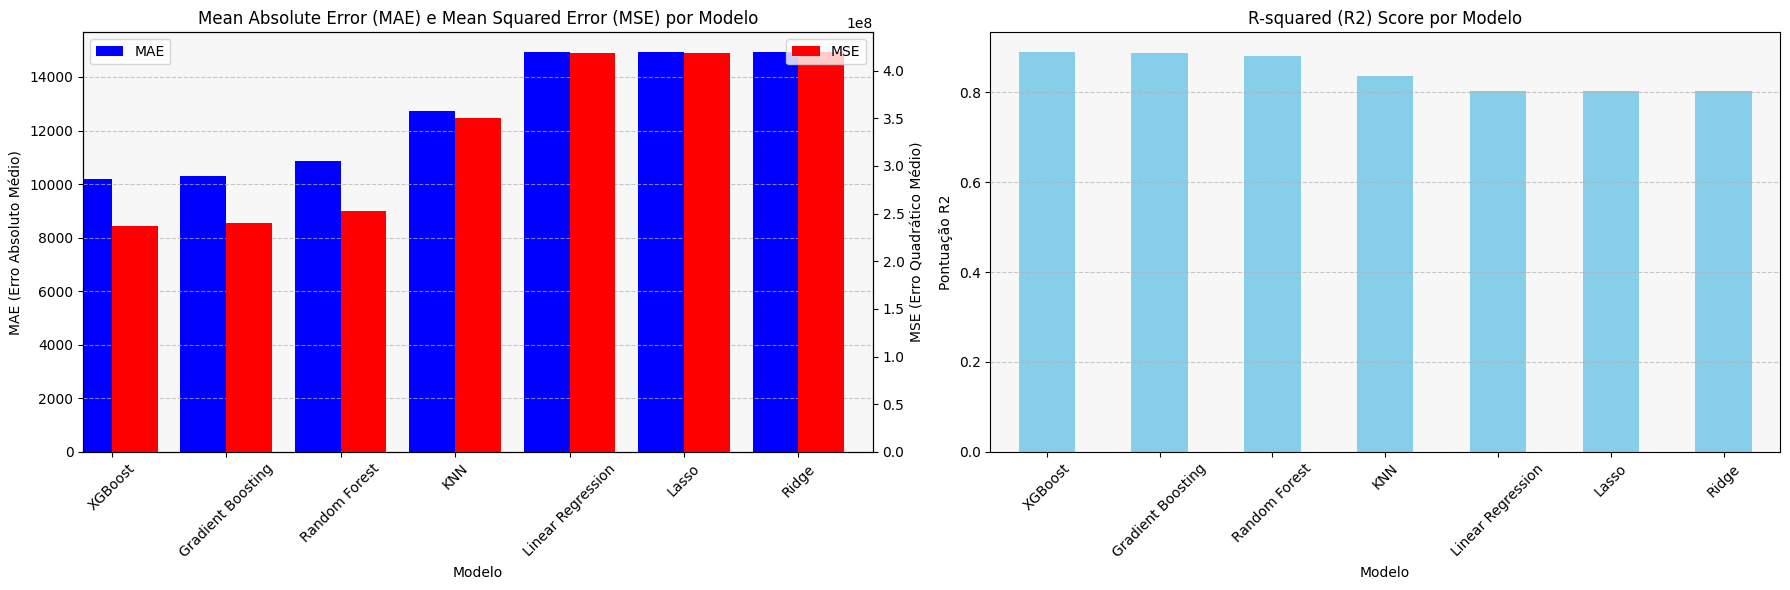

In [891]:
# Convertendo os resultados para um DataFrame para facilitar a plotagem
df_results = pd.DataFrame(results).T
df_results = df_results.sort_values(by='R2', ascending=False)

# Criando a figura com dois subplots para MAE/MSE e R2
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotando MAE e MSE
# Criando um segundo eixo Y para ajustar as escalas do MAE e MSE
ax2 = axes[0].twinx()

# Plotando MAE no eixo prim√°rio
df_results['MAE'].plot(kind='bar', ax=axes[0], color='blue', position=1, width=0.4)
axes[0].set_ylabel("MAE (Erro Absoluto M√©dio)")
axes[0].set_xlabel("Modelo")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotando MSE no segundo eixo Y
df_results['MSE'].plot(kind='bar', ax=ax2, color='red', position=0, width=0.4)
ax2.set_ylabel("MSE (Erro Quadr√°tico M√©dio)")

# Ajustando t√≠tulo e legendas
axes[0].set_title('Mean Absolute Error (MAE) e Mean Squared Error (MSE) por Modelo')
axes[0].legend(["MAE"], loc="upper left")
ax2.legend(["MSE"], loc="upper right")

# Ajuste do fundo
axes[0].set_facecolor('#f7f7f7')
ax2.set_facecolor('#f7f7f7')

# Plotando R2 Score
df_results['R2'].plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('R-squared (R2) Score por Modelo')
axes[1].set_ylabel('Pontua√ß√£o R2')
axes[1].set_xlabel('Modelo')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_facecolor('#f7f7f7') # Cor de fundo leve

# Ajustando layout e exibindo os gr√°ficos
plt.tight_layout()
plt.show()

Realizaremos a avalia√ß√£o dos diferentes modelos de aprendizado de m√°quina, calculando m√©tricas de erro e exibindo gr√°ficos de dispers√£o para visualizar o desempenho dos modelos.

A linha vermelha representa a realidade e as bolas azuis as previs√µes.

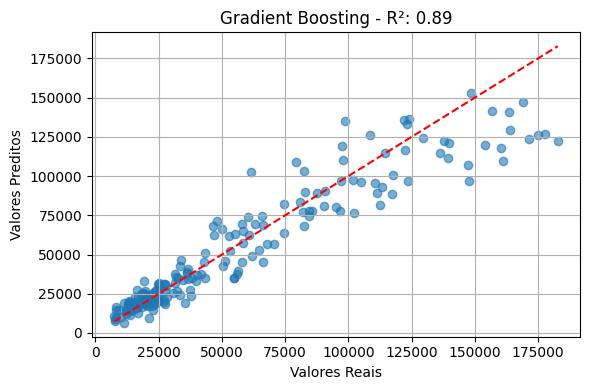

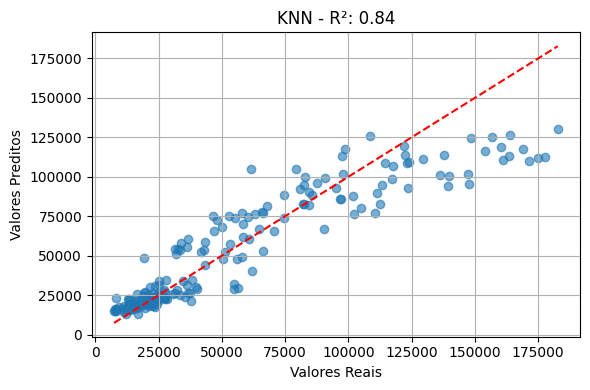

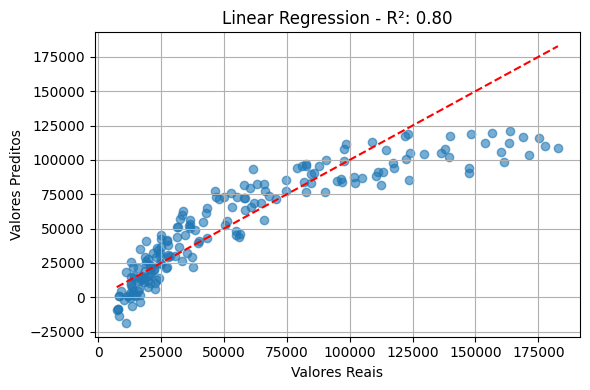

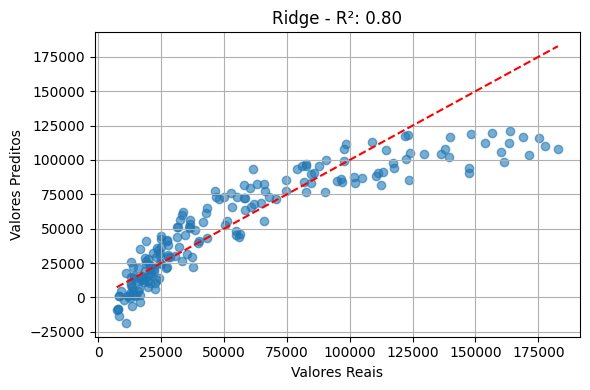

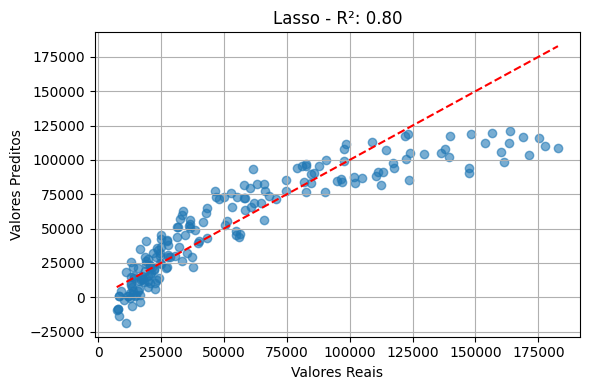

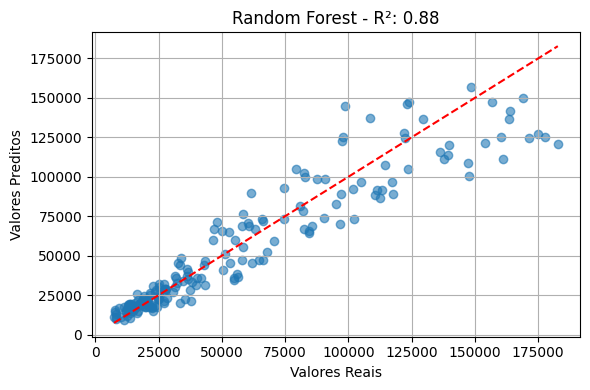

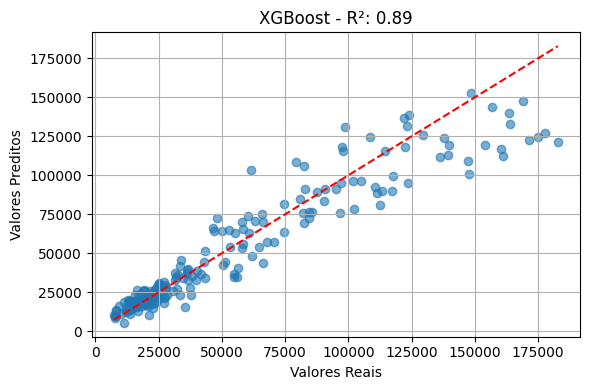

In [892]:
for name, model in models.items():
    model.fit(x_train_escalonado, y_train)
    y_pred = model.predict(x_test_escalonado)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

    # Gr√°fico de Dispers√£o
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Preditos')
    plt.title(f'{name} - R¬≤: {results[name]["R2"]:.2f}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Observa√ß√µes**
1. Para todos os modelos, conforme o valor de encargo √© mais alto a acur√°cia come√ßa a cair;
2. O Lasso foi bem at√© os valores medianos dos encargos, come√ßando a cair consideralvelmente depois, iniciando uma curva para baixo;
3. O Ridge foi parecido com o Lasso, descrito no item 2;
4. Linear Regression come√ßou a cair pr√≥ximo do 4/4 dos encargos, assim com o KNN, tamb√©m iniciando uma curva para baixo;
5. Os melhores modelos, XGBoost, Gradient Boosting e Random Forest, se mantiveram pr√≥ximos da previs√£o real durente todo o gr√°fico. Apresentaram um pequeno descolamento nos valores mais altos, mas n√£o geram a curvas significativas para baixo ou para cima.

**Distribui√ß√£o dos Erros Residuais**





Aqui verificamos se o modelo est√° cometendo muitos erros grandes ou se os erros est√£o centrados em torno de zero (bom sinal).

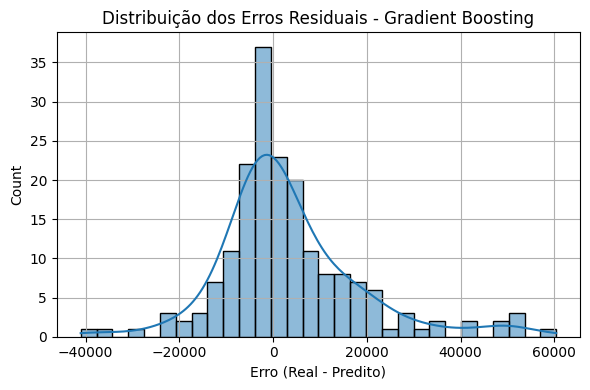

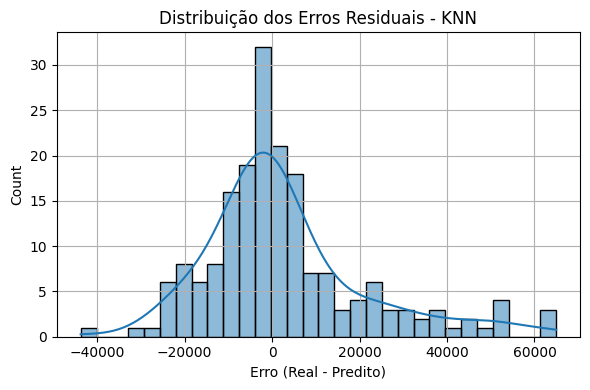

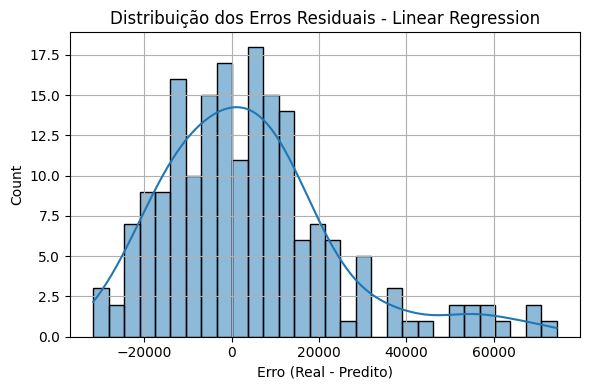

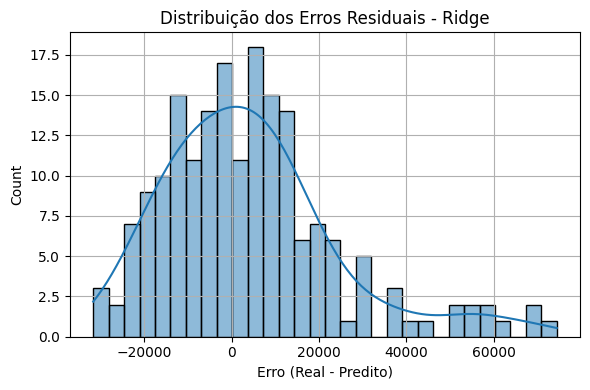

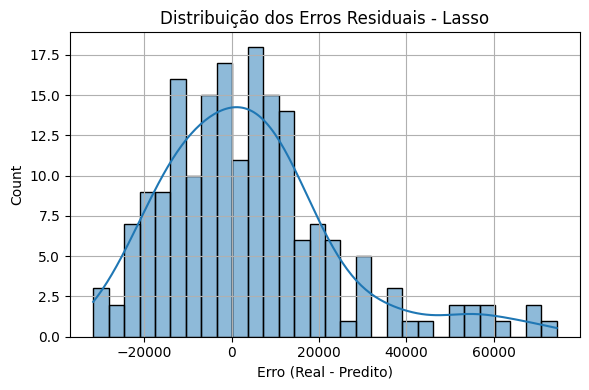

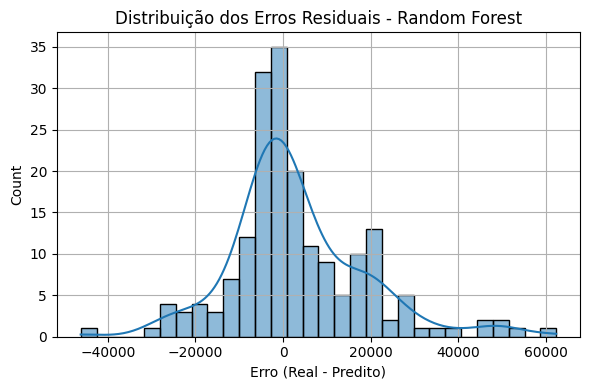

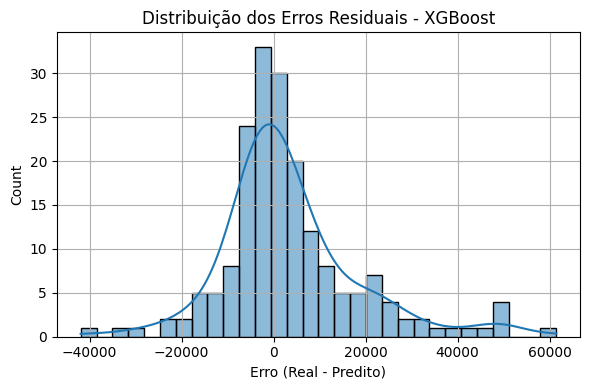

In [893]:
import seaborn as sns

for name, model in models.items():
    y_pred = model.predict(x_test_escalonado)
    residuals = y_test - y_pred

    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'Distribui√ß√£o dos Erros Residuais - {name}')
    plt.xlabel('Erro (Real - Predito)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Boxplot dos Erros Residuais por Modelo**

Comparativo visual dos erros residuais entre os modelos. Quando mais agrupados, melhor o modelo.

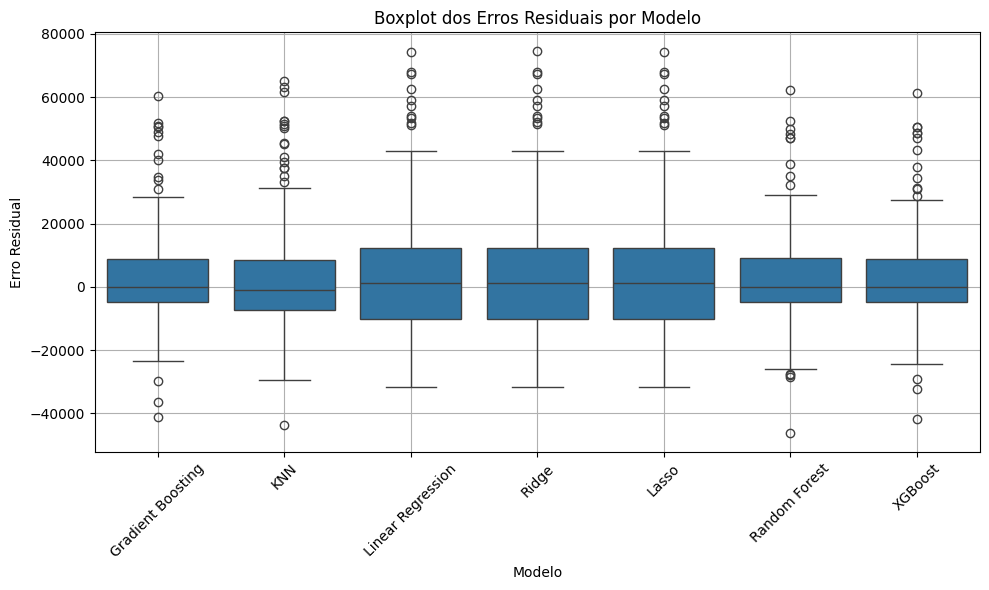

In [894]:
import pandas as pd

residuals_df = pd.DataFrame()
for name, model in models.items():
    y_pred = model.predict(x_test_escalonado)
    residuals = y_test - y_pred
    temp_df = pd.DataFrame({'Modelo': name, 'Erro Residual': residuals})
    residuals_df = pd.concat([residuals_df, temp_df])

plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df, x='Modelo', y='Erro Residual')
plt.title('Boxplot dos Erros Residuais por Modelo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Analisando o gr√°fico acima, notamos que os melhores modelos, mesmo apresentando ouliers, mant√©m a acur√°cia da previs√£o.

# **Conclus√£o**

Com base em todo o trabalho realizado, conclu√≠mos que o fator mais relevante para a determina√ß√£o do custo do plano de sa√∫de √© o tabagismo. Fumantes tendem a pagar valores mais altos, independentemente da idade, do n√∫mero de filhos ou do √≠ndice de massa corporal (IMC).

A base de dados utilizada mostrou-se coerente com a realidade da popula√ß√£o, o que contribuiu para a obten√ß√£o de resultados consistentes nas previs√µes. Observamos tamb√©m que, embora o g√™nero seja uma vari√°vel presente, o fato de a pessoa ser fumante teve um impacto significativamente maior no custo, tanto para homens quanto para mulheres.

Foram testados sete modelos de regress√£o, sendo que os algoritmos XGBoost e Gradient Boosting apresentaram os melhores desempenhos. Ambos alcan√ßaram coeficientes de determina√ß√£o (R¬≤) superiores a 0,85, com baixos erros e alta precis√£o nas previs√µes. Curiosamente, os modelos baseados em √°rvores destacaram-se como os mais eficazes neste contexto.